# <center><span style="color:black"> Homework IV - Statistical learning and Big data </style></center>
##  <center><span style="color:black"> Student : Khalil Zlaoui </style></center>

## Question 11 (a)

In [160]:
library(ISLR)
data(Auto)

# We remove mpg and replace it by mpg01 gas, equal to 1 if mpg > median(mpg)

Auto$mpg01<-ifelse(Auto$mpg>median(Auto$mpg),1,0)
Auto<-Auto[,-1]
Auto$cylinders<-as.factor(Auto$cylinders)
Auto$origin<-as.factor(Auto$origin)
Auto$name<-as.factor(Auto$name)
Auto$mpg01<-as.factor(Auto$mpg01)

summary(Auto)

 cylinders  displacement     horsepower        weight      acceleration  
 3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613   Min.   : 8.00  
 4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225   1st Qu.:13.78  
 5:  3     Median :151.0   Median : 93.5   Median :2804   Median :15.50  
 6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978   Mean   :15.54  
 8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615   3rd Qu.:17.02  
           Max.   :455.0   Max.   :230.0   Max.   :5140   Max.   :24.80  
                                                                         
      year       origin                  name     mpg01  
 Min.   :70.00   1:245   amc matador       :  5   0:196  
 1st Qu.:73.00   2: 68   ford pinto        :  5   1:196  
 Median :76.00   3: 79   toyota corolla    :  5          
 Mean   :75.98           amc gremlin       :  4          
 3rd Qu.:79.00           amc hornet        :  4          
 Max.   :82.00           chevrolet chevette:  4          
  

## Question 11 (b)

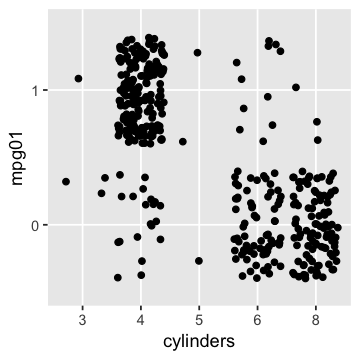

In [161]:
# mpg01 vs. cylinders
options(repr.plot.width=3, repr.plot.height=3)
plot1 = ggplot(Auto, aes(cylinders,mpg01))
plot1+geom_jitter()


- Vehicles with fewer cylinders have higher miles per gallon.

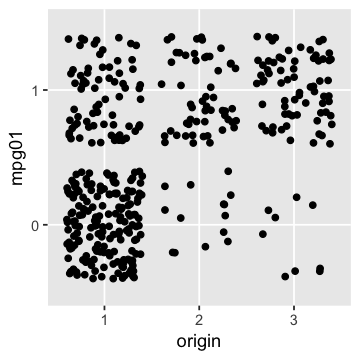

In [162]:
# mpg01 vs. origin
plot1 = ggplot(Auto, aes(origin,mpg01))
plot1+geom_jitter()

- Vehicles with origin 2 or 3 have higher miles per gallon. Vehicles with origin 1 have slightly lower miles per gallon.

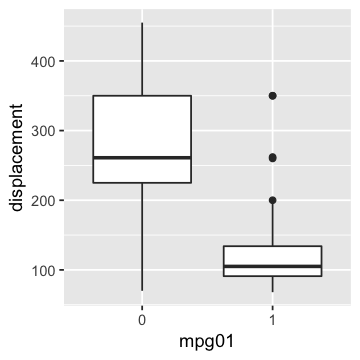

In [163]:
# mpg01 vs. displacement
plot1 = ggplot(Auto, aes(mpg01,displacement))
plot1+geom_boxplot()

- Vehicles with smaller displacement value have higher miles per gallon.

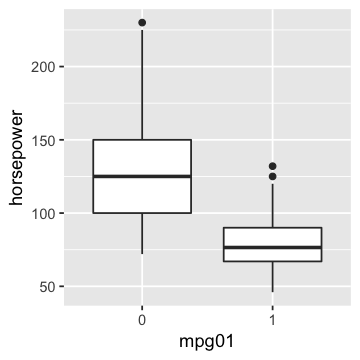

In [164]:
# mpg01 vs. horsepower
plot1 = ggplot(Auto, aes(mpg01,horsepower))
plot1+geom_boxplot()

- Vehicles with fewer horsepowers have higher miles per gallon.

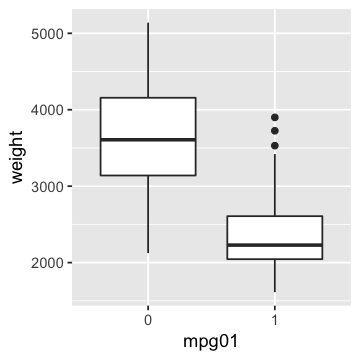

In [165]:
# mpg01 vs. weight
plot1 = ggplot(Auto, aes(mpg01,weight))
plot1+geom_boxplot()

- Lighter vehicles have higher miles per gallon

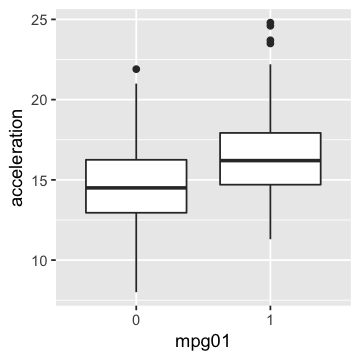

In [166]:
# mpg01 vs. acceleration
plot1 = ggplot(Auto, aes(mpg01,acceleration))
plot1+geom_boxplot()

- Slower vehicles (higher acceleration time) have higher miles per gallon

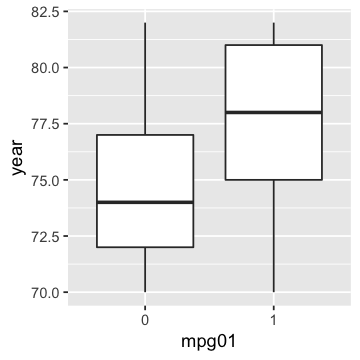

In [167]:
# mpg01 vs. year
plot1 = ggplot(Auto, aes(mpg01,year))
plot1+geom_boxplot()

- Newer vehicles have higher miles per gallon

$\textbf{Findings}$ :

It looks like all variables are able to make at least a subltle difference between vehicles with higher than median mpg, and vehicles with lower than median mpg. It is hard to assess just graphically which one is mort important than another.

- However, it looks like "cylinders" are more powerful than "origin" to differenciate mpg01. 


- Looking at boxplots and boxes that are clearly separated, it looks like "horsepower", "displacement" and "weight" are more powerful than the variables "year" and "differenciation", in distinguishing mpg01 values.

## Question 11 (c)

In preparation for Q (g), we will subset to the most influential other variables :  "cylinders", "horsepower", "displacement" and "weight".

In [169]:
Auto$cylinders=as.integer(Auto$cylinders)
Auto = Auto[,c(1,2,3,4,9)]
head(Auto)

cylinders,displacement,horsepower,weight,mpg01
5,307,130,3504,0
5,350,165,3693,0
5,318,150,3436,0
5,304,150,3433,0
5,302,140,3449,0
5,429,198,4341,0


In [170]:
nrow(Auto)
ncol(Auto)

[1] 392

[1] 5

Split to train and test using $\frac{2}{3}$ as train

In [181]:
set.seed(3)
trainsample = sample(nrow(Auto),nrow(Auto)*(2/3),replace=FALSE)
Auto.Train = Auto[trainsample,]
Auto.Test = Auto[-trainsample,]

In [182]:
nrow(Auto.Train)
nrow(Auto.Test)

[1] 261

[1] 131

## Question 11 (g)

We will use the other variables :  "cylinders", "horsepower", "displacement" and "weight".

In [183]:
standardized.Auto.Train.X=scale(Auto.Train [,-5])
standardized.Auto.Test.X=scale(Auto.Test [,-5])

Auto.Train.Y=Auto.Train [,5]
Auto.Test.Y=Auto.Test [,5]

In [184]:
library(class)
set.seed(3)

K=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)

for (k in K) {
    
    knn.pred = knn(standardized.Auto.Train.X,standardized.Auto.Test.X,Auto.Train.Y,k)
    print(paste0("For k=",k,", the test error is ",round(mean(Auto.Test.Y!=knn.pred),3)))
    
}

[1] "For k=1, the test error is 0.115"
[1] "For k=2, the test error is 0.13"
[1] "For k=3, the test error is 0.107"
[1] "For k=4, the test error is 0.122"
[1] "For k=5, the test error is 0.115"
[1] "For k=6, the test error is 0.13"
[1] "For k=7, the test error is 0.13"
[1] "For k=8, the test error is 0.115"
[1] "For k=9, the test error is 0.115"
[1] "For k=10, the test error is 0.115"
[1] "For k=11, the test error is 0.115"
[1] "For k=12, the test error is 0.115"
[1] "For k=13, the test error is 0.115"
[1] "For k=14, the test error is 0.115"


With set.seed(3) as our randomization choice, it looks like k=3 yields the smallest error. 

## Question 8

### ADABOOST

In [1]:
library(ISLR)
data(Caravan)

Caravan$Purchase<-ifelse(Caravan$Purchase=="Yes",1,0)
Caravan$Purchase<-as.factor(Caravan$Purchase)
train=seq(1,1000,1)
train.Caravan=Caravan[train,]
test.Caravan=Caravan[-train,]

head(test.Caravan)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,⋯,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1001,40,1,5,3,10,1,1,5,3,9,⋯,0,0,0,1,0,0,0,0,0,0
1002,26,1,1,5,6,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,1
1003,10,1,4,2,3,2,6,0,3,6,⋯,0,0,0,0,0,0,0,0,0,0
1004,38,1,2,2,9,0,4,2,4,7,⋯,0,0,0,0,0,0,0,0,0,0
1005,39,2,3,3,9,1,5,0,3,7,⋯,0,0,0,0,0,0,0,0,0,0
1006,9,1,4,2,3,2,3,1,5,7,⋯,0,0,0,1,0,0,0,0,0,1


In [202]:
#install.packages("adabag")
library(adabag)


In [203]:
model_adabag = boosting(Purchase~.,train.Caravan,boos=F)

In [204]:
prediction = predict(model_adabag,test.Caravan)

In [206]:
result = cbind(test.Caravan,prob=prediction$prob,pred=prediction$class)
head(result)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,⋯,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase,prob.1,prob.2,pred
1001,40,1,5,3,10,1,1,5,3,9,⋯,1,0,0,0,0,0,0,0.8786192,0.12138077,0
1002,26,1,1,5,6,0,4,2,4,3,⋯,1,0,0,0,0,0,1,0.9181210,0.08187899,0
1003,10,1,4,2,3,2,6,0,3,6,⋯,0,0,0,0,0,0,0,0.6917935,0.30820651,0
1004,38,1,2,2,9,0,4,2,4,7,⋯,0,0,0,0,0,0,0,0.8590090,0.14099100,0
1005,39,2,3,3,9,1,5,0,3,7,⋯,0,0,0,0,0,0,0,0.3864458,0.61355425,1
1006,9,1,4,2,3,2,3,1,5,7,⋯,1,0,0,0,0,0,1,0.7030058,0.29699418,0


In [208]:
tb = table(result$Purchase,result$pred)
tb

   
       0    1
  0 4438   95
  1  279   10

In [211]:
accuracy = sum(diag(tb))/sum(tb)
round(accuracy,3)

[1] 0.922

### XGBOOST

In [54]:
#install.packages("xgboost")
library(xgboost)

In [55]:
library(ISLR)
data(Caravan)

Caravan$Purchase<-as.numeric(ifelse(Caravan$Purchase=="Yes",1,0))
Caravan$Purchase<-as.factor(Caravan$Purchase)
train=seq(1,1000,1)
train.Caravan=Caravan[train,]
test.Caravan=Caravan[-train,]

In [1]:
Caravan2 = lapply(Caravan,as.numeric)
Caravan2 = as.data.frame(Caravan2)

Caravan2$Purchase[Caravan2$Purchase == 1] <- 0
Caravan2$Purchase[Caravan2$Purchase == 2] <- 1

#str(Caravan2)
#names(Caravan2)

train=seq(1,1000,1)
train.Caravan2.X=Caravan2[train,-86]
test.Caravan2.X=Caravan2[-train,-86]

train.Caravan2.Y=Caravan2[train,"Purchase"]
test.Caravan2.Y=Caravan2[-train,"Purchase"]

ERROR: Error in lapply(Caravan, as.numeric): object 'Caravan' not found


In [61]:
xgb_train = xgb.DMatrix(data=data.matrix(train.Caravan2.X), label=train.Caravan2.Y)
xgb_test = xgb.DMatrix(data=data.matrix(test.Caravan2.X), label=test.Caravan2.Y)

In [2]:
xgb_model = xgboost(data = xgb_train, eta =0.1, nround = 50,params = list(objective = "binary:logistic"), gamma = 0.5)

ERROR: Error in xgboost(data = xgb_train, eta = 0.1, nround = 50, params = list(objective = "binary:logistic"), : could not find function "xgboost"


In [72]:
pred = predict(xgb_model, xgb_test)
result = cbind(Purchase=test.Caravan2.Y,prob=pred,pred=round(pred))
head(data.frame(result))

Purchase,prob,pred
0,0.02541650,0
1,0.04987097,0
0,0.07404721,0
0,0.02174993,0
0,0.40979028,0
1,0.16921860,0


In [73]:
tb = table(result[, 1], result[, 3])
tb
accuracy <- sum(diag(tb))/sum(tb)
accuracy

   
       0    1
  0 4507   26
  1  284    5

[1] 0.9357113

Both Adaboost and XGboost give good prediction rates.

XGboost gives a slightly better prediction, with a prediction rate of 0.935 vs. 0.92 for Adaboost.